In [78]:
# Load the boston housing data set from sklearn.datasets 
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data,columns= boston.feature_names)
df_target = pd.DataFrame(boston.target)

print(df.head())

df_target = df_target.rename(columns={0: 'target'})
print(df_target.head())
print(boston.DESCR)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
   target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    p

In [79]:
# aim to find the most correlated columns in our feature set, with the target column
df = pd.concat([df,df_target],axis=1)
#print(ex.head())
df[df.columns[1:]].corr()['target'][:]

ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [80]:
# Based on results of the correlation check, we select RM and LSTAT as the most correlated columns to our target set
# and use them to predict the house prices

df = df[['RM','target']]
df.insert(0,'ones',1)

#print(len(df))
# Divide it into train and test sets

from sklearn.utils import shuffle
df = shuffle(df)


# for testing our model, we will begin with less number of data for train and test and then include more row.

train_df = df[0:350]
test_df = df[350:506]

print(len(train_df))
print(len(test_df))

print(train_df.head())

350
156
     ones     RM  target
324     1  6.415    25.0
128     1  6.431    18.0
422     1  5.648    20.8
268     1  7.470    43.5
413     1  5.155    16.3


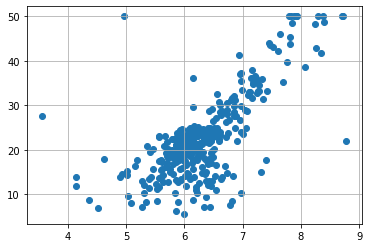

In [81]:
import matplotlib.pyplot as plt

plt.Figure(figsize=(8, 8))
plt.scatter(train_df['RM'], train_df['target']) # positively correlated with house prices
plt.grid()
plt.show()

In [82]:
# With the intercept and fixed learning rate
def linear_regression(df,y,theta,alpha,iter,eps):


  n = df.shape[0]
  df = np.array(df)
  y = y.reshape(len(y),1)

  for i in range(0,iter):
    
    y_hat = np.dot(df,theta)  
    err = y-y_hat
    
    loss = 1/n * np.sum((err)**2)
    #print("iter:",i,"loss:",loss)

    if abs(loss) < eps:
      return theta

    else:
  
      g = -2/n * np.dot(df.T,err)
      d = np.array(g/np.linalg.norm(g))
      theta =  theta - alpha*g
  return loss,theta
    

In [83]:
import numpy as np

df = train_df[['ones','RM']]
y = np.array(train_df['target'])
alpha = 0.009
c = df.shape[1]
iter = 20000
theta = np.random.rand(c,1) # Specifying random values for theta
#theta = np.ones((1,c))
loss,theta = linear_regression(df,y,theta,alpha,iter,eps=1e-4)

In [86]:
# Predict values 

X = test_df[['RM']]
test_target = test_df[['target']]
x = test_df[['ones',  'RM']]
y_pred = np.dot(x,theta)


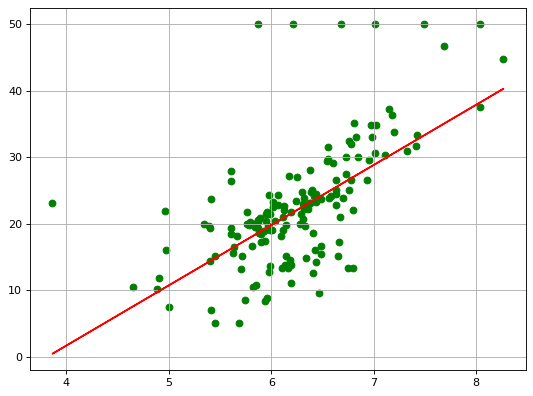

In [87]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X,test_target,color='green')
plt.plot(X,y_pred,color='red')
plt.grid()
plt.show()